In [1]:
#main imports
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import acquire
import os
import scipy
import scipy.stats as stats
import sklearn.impute as simpleImputer
import statsmodels.api as sm

#partial imports
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,PolynomialFeatures,QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import RFE, f_regression, SelectKBest
from statsmodels.tsa.api import Holt

#custom imports
import acquire
import prepare
import explore


In [2]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round((mean_squared_error(validate[target_var], yhat_df[target_var]))**.5, 0)
    return rmse

In [3]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(f'{eval_df["model_type"][-1:][0]},{target_var}')
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [4]:
# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return pd.concat([eval_df,d], axis=0)

store ids = [ 1  2  3  4  5  6  7  8  9 10] | store cities = ['San Antonio'] | store states = ['TX']
sale amount count = 213 | sale date count = 1826
item brand count = 49 | item name count = 50 | item_price count = 47


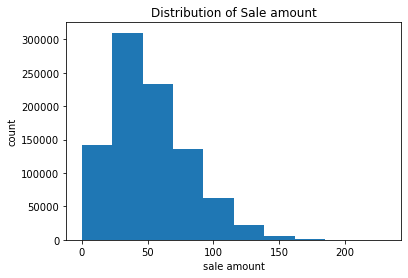

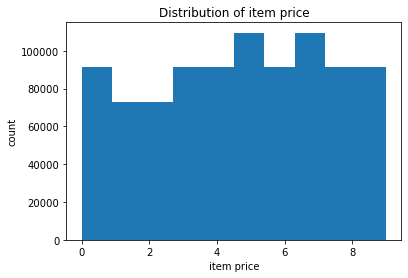

,sale_amount,sales_total
sale_date,,
2013-01-06,91067.0,490767.50
2013-01-13,103902.0,559934.21
2013-01-20,102950.0,552813.52
2013-01-27,103298.0,554908.84
2013-02-03,109027.0,586547.55


In [5]:
target="sales_total"
df = prepare.prep_sales()
for year in df.index.year.unique().tolist():
    df = df[df.index != f'{year}-02-29']
df_monthly = df[["sale_amount","store_address","item_brand","sales_total"]].resample("W").sum()
df_monthly.head()

(157, 2) train shape
(52, 2) validate shape
(52, 2) test shape


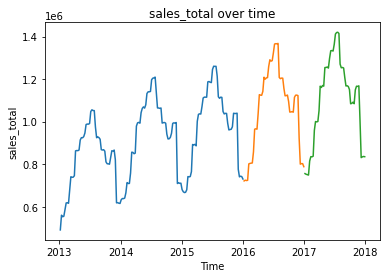

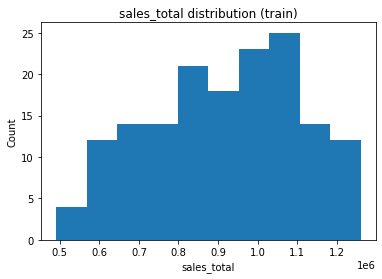

In [6]:
train, validate, test, y_train, y_validate, y_test = explore.explore_split_time_series(df_monthly,target)
#explore.explore_target_mean_time_series(y_train,target)
#explore.explore_target_diff_time_series(y_train,target)
#explore.explore_target_weekly_time_series(train,target)
#explore.explore_target_bin_compare_time_series(train,target,bin="D",scale="M",year="2014")

sale_amount -- RMSE: 71818


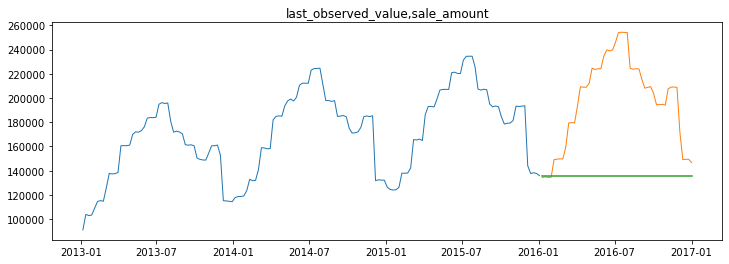

sales_total -- RMSE: 386492


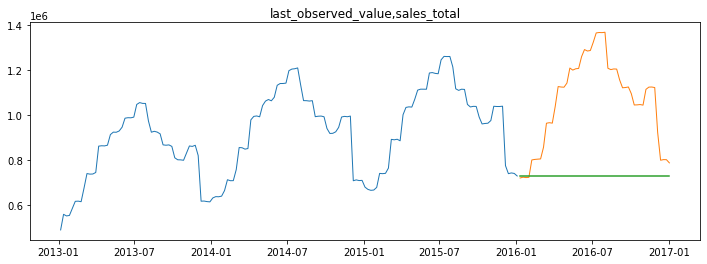

sale_amount -- RMSE: 45647


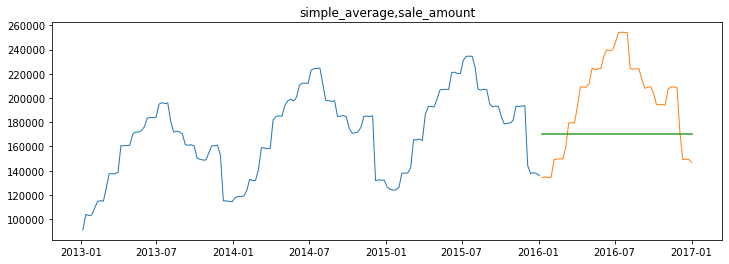

sales_total -- RMSE: 245299


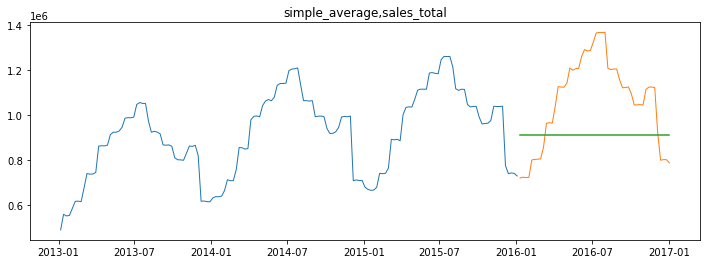

sales_total -- RMSE: 386492


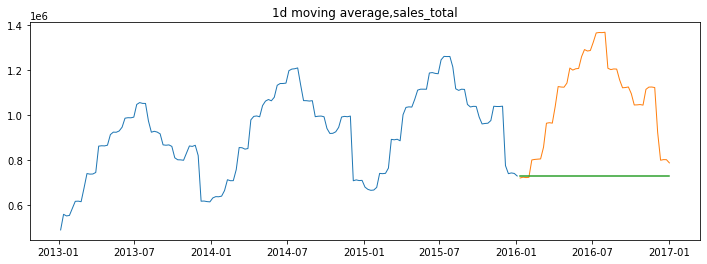

sales_total -- RMSE: 378916


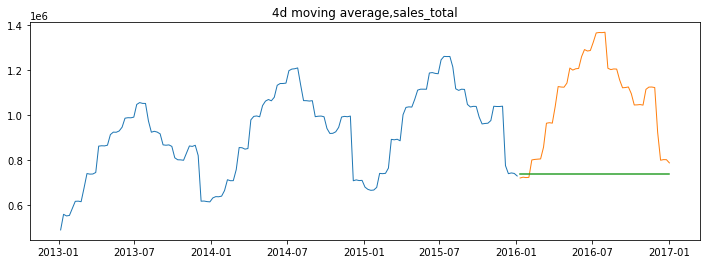

sales_total -- RMSE: 254505


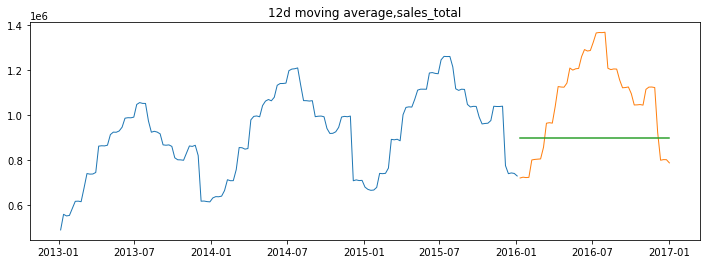

sales_total -- RMSE: 199886


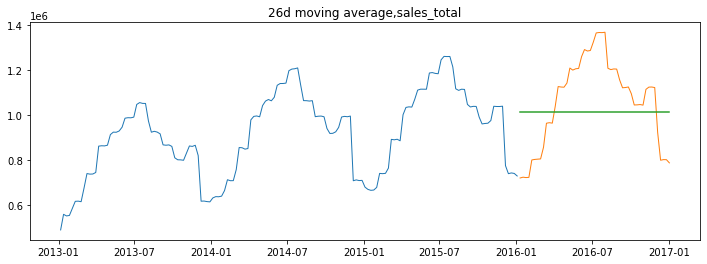

sales_total -- RMSE: 209099


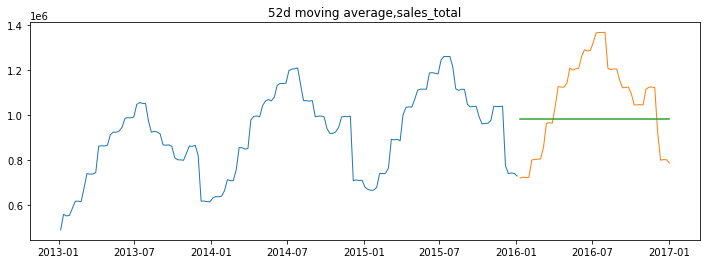

sales_total -- RMSE: 217900


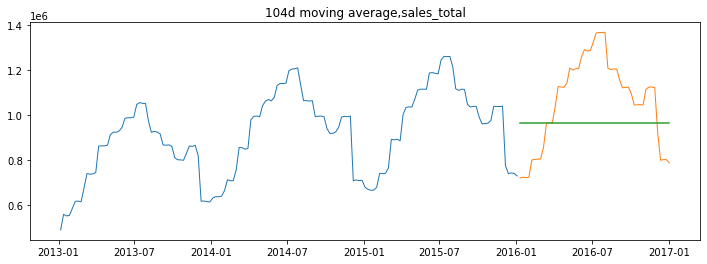

sale_amount -- RMSE: 137720


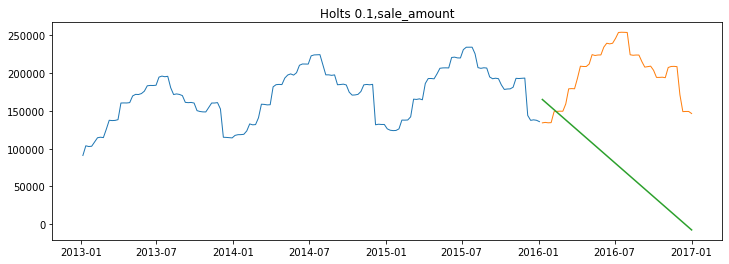

sales_total -- RMSE: 740158


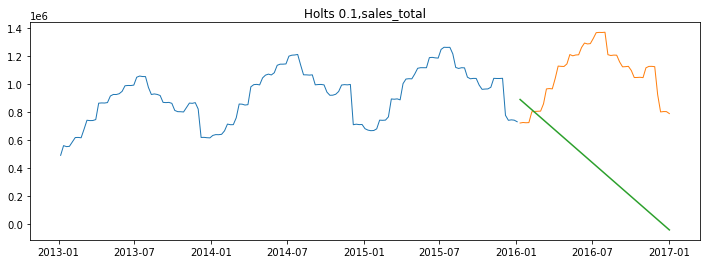

sale_amount -- RMSE: 301373


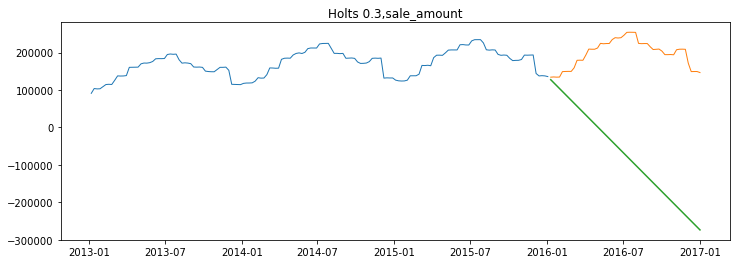

sales_total -- RMSE: 1619388


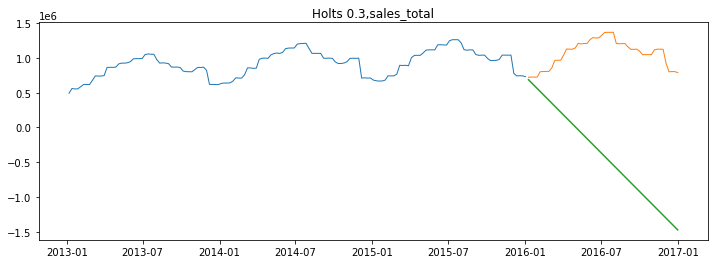

sale_amount -- RMSE: 263252


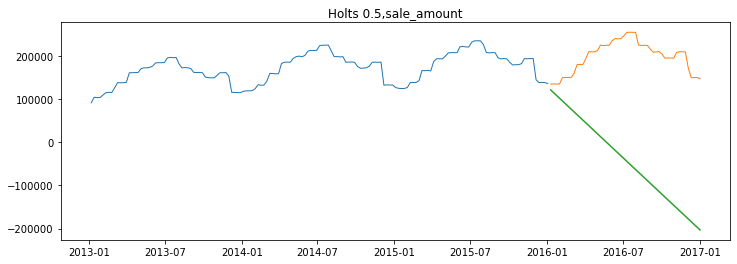

sales_total -- RMSE: 1418173


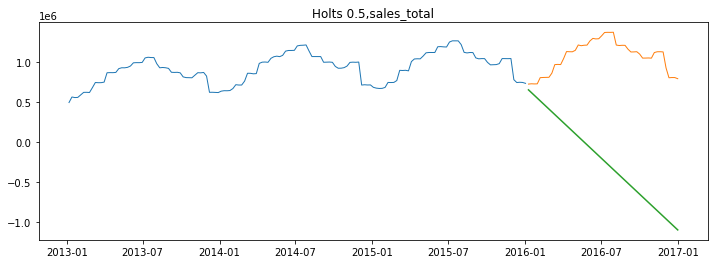

sale_amount -- RMSE: 59990


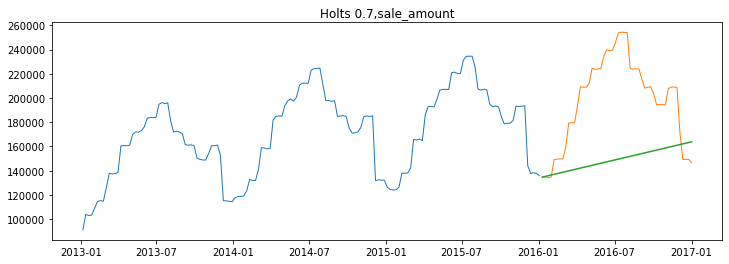

sales_total -- RMSE: 334250


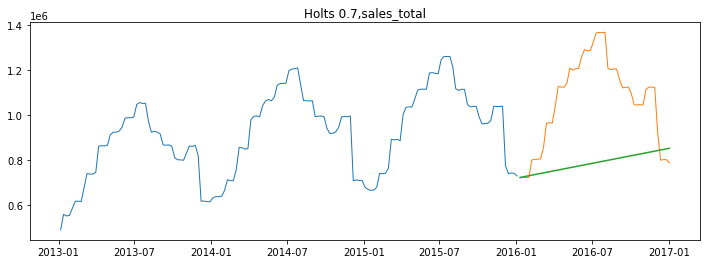

sale_amount -- RMSE: 100966


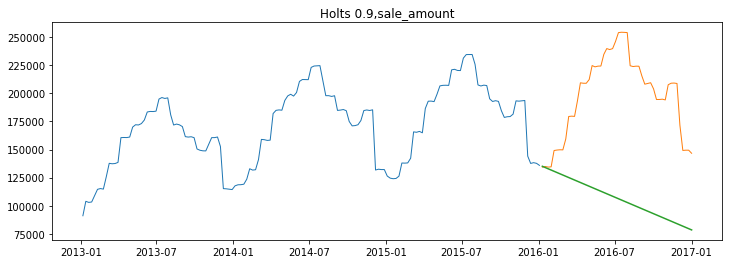

sales_total -- RMSE: 572191


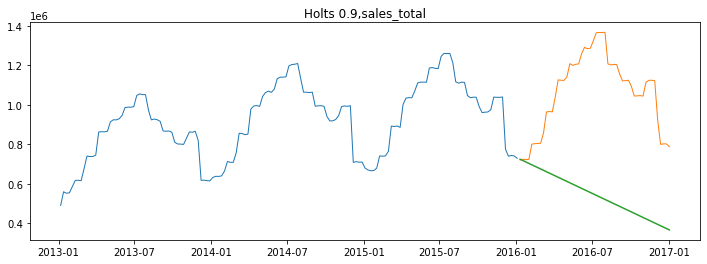

sale_amount -- RMSE: 4850


/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_39426/1151799911.py:63: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  validate = df1['2015']
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_39426/1151799911.py:64: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df1['2016']


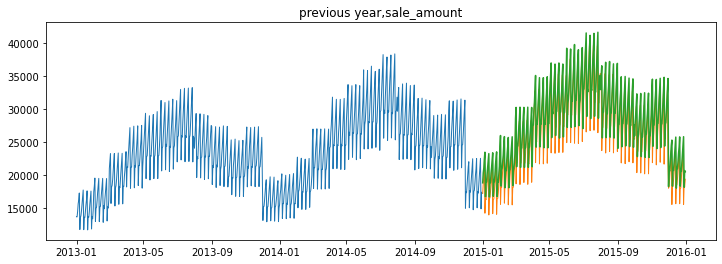

sales_total -- RMSE: 26049


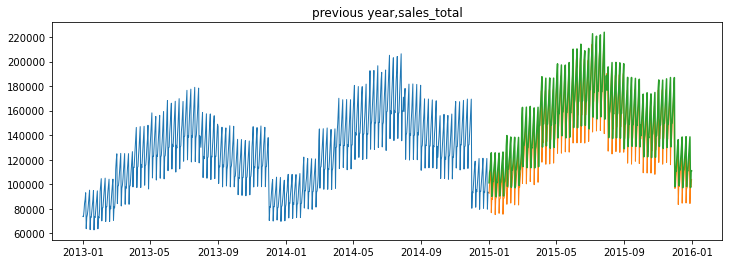

,model_type,target_var,rmse
0,last_observed_value,sale_amount,71818.0
0,last_observed_value,sales_total,386492.0
0,simple_average,sale_amount,45647.0
0,simple_average,sales_total,245299.0
0,1d moving average,sale_amount,71818.0
0,1d moving average,sales_total,386492.0
0,4d moving average,sale_amount,70538.0
0,4d moving average,sales_total,378916.0
0,12d moving average,sale_amount,47361.0
0,12d moving average,sales_total,254505.0


In [7]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

target1 = "sale_amount"
target2 = "sales_total"

items = train[target1][-1:][0]
dollars = round(train[target2][-1:][0],2)

yhat_df = pd.DataFrame({target1: [items], target2: [dollars]}, index = validate.index)

#baseline
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', target_var = col)
    plot_and_eval(col)

#simple average
items = round(train[target1].mean(), 2)
dollars = round(train[target2].mean(), 2)

yhat_df = pd.DataFrame({target1: [items],target2: [dollars],}, index = validate.index)

for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', target_var = col)
    plot_and_eval(col)


#rolling average
periods = [1, 4, 12, 26, 52, 104]

for p in periods:
    items = round(train[target1].rolling(p).mean().iloc[-1], 2)
    dollars = round(train[target2].rolling(p).mean().iloc[-1], 2)

    yhat_df = pd.DataFrame({target1: [items],target2: [dollars],}, index = validate.index)

    model_type = str(p) + 'd moving average'
    eval_df = append_eval_df(model_type = model_type,target_var = target1)
    eval_df = append_eval_df(model_type = model_type,target_var = target2)
    plot_and_eval(col)

#Holt:

#exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)
#fit:
#smoothing_level (α): value between (0,1)
#smoothing_slope (β): value between (0,1)
ones_to_try = [.1,.3,.5,.7,.9]
for each in ones_to_try:
    for col in train.columns:
        model = Holt(train[col], exponential = False)
        model = model.fit(smoothing_level = each, smoothing_trend = each, optimized = False)
        yhat_items = model.predict(start = validate.index[0], end = validate.index[-1])
        yhat_df[col] = round(yhat_items, 2)
        eval_df = append_eval_df(model_type = f'Holts {each}', target_var = col)
        plot_and_eval(target_var = col)



#predict on cycle
df1 = df[["sale_amount","sales_total"]].resample("D").sum()
train = df1[:'2014']
validate = df1['2015']
test = df1['2016']

yhat_df = train.loc['2014'] + train.diff(365).mean()
pd.concat([yhat_df.head(1), validate.head(1)])

yhat_df.index = validate.index

len(yhat_df)

for col in train.columns:
    eval_df = append_eval_df(model_type = 'previous year', target_var = col)
    plot_and_eval(target_var = col)


eval_df


In [8]:
min_rmse_dollars_sold = eval_df.groupby('target_var')['rmse'].min()[0]
min_rmse_items_sold = eval_df.groupby('target_var')['rmse'].min()[1]

# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[((eval_df.rmse == min_rmse_dollars_sold) | 
         (eval_df.rmse == min_rmse_items_sold)
        )]

,model_type,target_var,rmse
0,previous year,sale_amount,4850.0
0,previous year,sales_total,26049.0
